In [1]:
import sys
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms import num_comparison, nat_numbers, arithm_ops, combinators, pairs, logic
from calculus_path_mod.terms.pseudonym import *

from calculus_path_mod.json_serialization import load_terms
from fitter import Fitter, get_common_distributions
from calculus_utils.drawing import draw_steps_displot

# Load Terms

In [2]:
terms_LO = load_terms("../tests_11_retests/terms_210_filtered_LO.dat")
terms_RI = load_terms("../tests_11_retests/terms_210_filtered_RI.dat")

In [3]:
strategy_LO = LOStrategy()
strategy_LI = LIStrategy()

steps_LO_tLO = [term.normalize(strategy_LO)[1] for term in tqdm(terms_LO, desc="LO for t-LO")]
steps_LI_tLO = [term.normalize(strategy_LI)[1] for term in tqdm(terms_LO, desc="LI for t-LO")]

vertices_tLO = [term.vertices_number for term in tqdm(terms_LO)]
height_tLO = [term.term_height for term in tqdm(terms_LO)]
width_tLO = [term.term_width for term in tqdm(terms_LO)]

100%|██████████| 226/226 [00:00<00:00, 56500.73it/s]


In [4]:
redexes = [len(term.redexes) for term in tqdm(terms_LO)]

100%|██████████| 226/226 [00:00<00:00, 34704.28it/s]


In [5]:
def draw_dots_clouds(
        x_records, y_records,
        x_label="x", y_label="y", title="",
        x_limit=50, y_limit=50,
        is_rand=True
):
    x_clean, y_clean = [], []
    for inx in range(len(x_records)):
        if not (x_records[inx] > x_limit or y_records[inx] > y_limit):
            x_clean.append(x_records[inx] + np.random.normal(0, 0.07, size=1)[0] if is_rand else x_records[inx])
            y_clean.append(y_records[inx] + np.random.normal(0, 0.07, size=1)[0] if is_rand else y_records[inx])

    plt.scatter(x_clean, y_clean, s=3)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

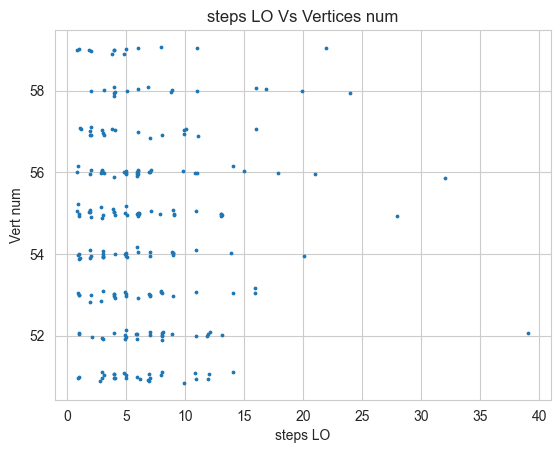

In [6]:
draw_dots_clouds(
    steps_LO_tLO, vertices_tLO,
    x_label="steps LO", y_label="Vert num", title="steps LO Vs Vertices num",
    x_limit=40, y_limit=100,
    is_rand=True
)

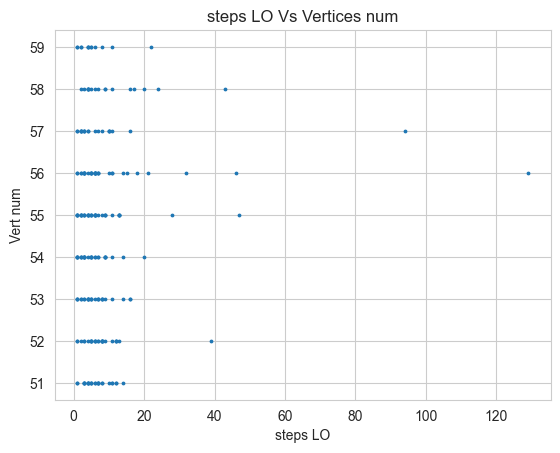

In [7]:
draw_dots_clouds(
    steps_LO_tLO, vertices_tLO,
    x_label="steps LO", y_label="Vert num", title="steps LO Vs Vertices num",
    x_limit=1000, y_limit=100,
    is_rand=False
)

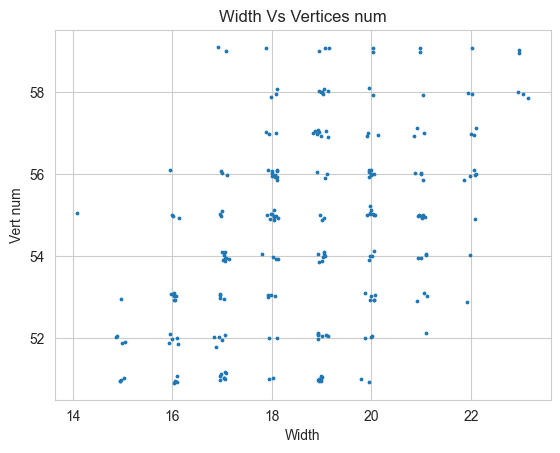

In [8]:
draw_dots_clouds(
    width_tLO, vertices_tLO,
    x_label="Width", y_label="Vert num", title="Width Vs Vertices num",
    x_limit=100, y_limit=100,
    is_rand=True
)

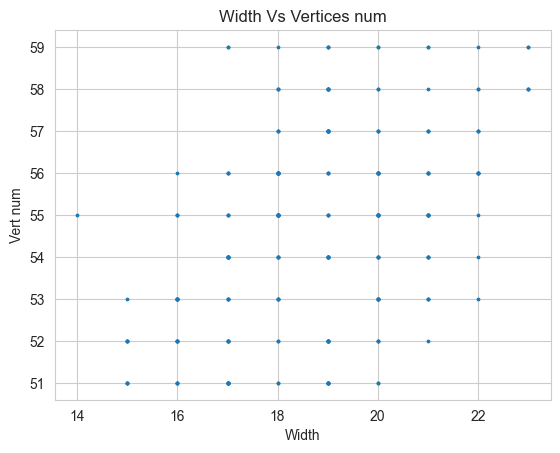

In [9]:
draw_dots_clouds(
    width_tLO, vertices_tLO,
    x_label="Width", y_label="Vert num", title="Width Vs Vertices num",
    x_limit=100, y_limit=100,
    is_rand=False
)

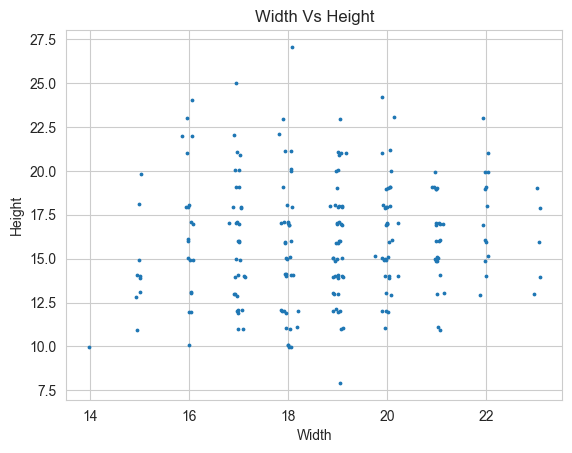

In [10]:
draw_dots_clouds(
    width_tLO, height_tLO,
    x_label="Width", y_label="Height", title="Width Vs Height",
    x_limit=100, y_limit=100,
    is_rand=True
)

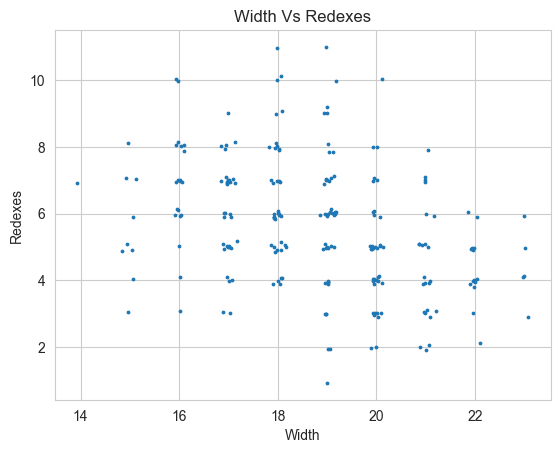

In [11]:
draw_dots_clouds(
    width_tLO, redexes,
    x_label="Width", y_label="Redexes", title="Width Vs Redexes",
    x_limit=100, y_limit=100,
    is_rand=True
)

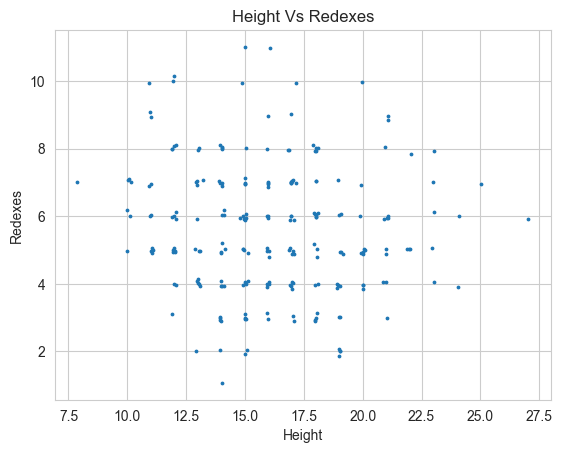

In [12]:
draw_dots_clouds(
    height_tLO, redexes,
    x_label="Height", y_label="Redexes", title="Height Vs Redexes",
    x_limit=100, y_limit=100,
    is_rand=True
)